In [1]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Files to load
heart_data = pd.read_csv("./heart.csv")
heart_predict = pd.read_csv("./Heart_Disease_Prediction.csv")


In [3]:
# assign heart_data DataFrame
heart_data_df = pd.DataFrame(heart_data)

# assign heart_predict dataframe

heart_predict_df = pd.DataFrame(heart_predict)

In [4]:
#disply heart_data DataFrame
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
#disply heart_predict DataFrame
heart_predict_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [6]:
test = heart_predict_df

In [7]:
test = test.replace({'Heart Disease': 'Presence'},1)
test = test.replace({'Heart Disease': 'Absence'},0)
test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [8]:
# columns
print(heart_predict.columns
     )

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [9]:
#disply heart_data_df
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
heart_data_df_cc = heart_data_df.rename(columns={"age": "Age",
                                              "sex": "Sex",                                               
                                              "cp": "Chest pain type",
                                              "trestbps": "BP",   
                                              "chol": "Cholesterol",
                                              "fbs": "FBS over 120",
                                             "exang": "Exercise angina",
                                                "ca": "Number of vessels fluro",
                                                "target": "Heart Disease"})
#disply
heart_data_df_cc

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,restecg,thalach,Exercise angina,oldpeak,slope,Number of vessels fluro,thal,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
# merge heart data w/ corrected columns with heart predict dataframe
heart_data_merge = pd.merge(test, heart_data_df_cc, how="outer", on=['Age', 
                                                                                 "Sex",
                                                                                 "Chest pain type",
                                                                                 "BP",
                                                                                 "Cholesterol",
                                                                                 "FBS over 120",
                                                                                 "Exercise angina",
                                                                                "Number of vessels fluro",
                                                                                 "Heart Disease"
                                                                                ])

# display
heart_data_merge


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,restecg,thalach,oldpeak,slope,thal
0,70,1,4,130,322,0,2.0,109.0,0,2.4,2.0,3,3.0,1,NaN,NaN,NaN,NaN,NaN
1,67,0,3,115,564,0,2.0,160.0,0,1.6,2.0,0,7.0,0,NaN,NaN,NaN,NaN,NaN
2,57,1,2,124,261,0,0.0,141.0,0,0.3,1.0,0,7.0,1,NaN,NaN,NaN,NaN,NaN
3,64,1,4,128,263,0,0.0,105.0,1,0.2,2.0,1,7.0,0,NaN,NaN,NaN,NaN,NaN
4,74,0,2,120,269,0,2.0,121.0,1,0.2,1.0,1,3.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,59,1,3,160,273,0,NaN,NaN,0,NaN,NaN,0,NaN,0,0.0,125.0,0.0,2.0,2.0
1291,59,1,3,160,273,0,NaN,NaN,0,NaN,NaN,0,NaN,0,0.0,125.0,0.0,2.0,2.0
1292,54,1,0,120,188,0,NaN,NaN,0,NaN,NaN,1,NaN,0,1.0,113.0,1.4,1.0,3.0
1293,54,1,0,120,188,0,NaN,NaN,0,NaN,NaN,1,NaN,0,1.0,113.0,1.4,1.0,3.0


In [12]:
# checking for NaN values in merge dataframe
nan_columns = heart_data_merge.isna().any()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                 True
Max HR                      True
Exercise angina            False
ST depression               True
Slope of ST                 True
Number of vessels fluro    False
Thallium                    True
Heart Disease              False
restecg                     True
thalach                     True
oldpeak                     True
slope                       True
thal                        True
dtype: bool


In [13]:
# removing NaN columns from dataframe
heart_data_dn = heart_data_merge.dropna(axis=1)

# disply data w/o NaN
heart_data_dn


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,0,0,3,1
1,67,0,3,115,564,0,0,0,0
2,57,1,2,124,261,0,0,0,1
3,64,1,4,128,263,0,1,1,0
4,74,0,2,120,269,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1290,59,1,3,160,273,0,0,0,0
1291,59,1,3,160,273,0,0,0,0
1292,54,1,0,120,188,0,0,1,0
1293,54,1,0,120,188,0,0,1,0


In [14]:
# Check for duplicate rows
duplicate_rows = heart_data_dn.duplicated()

# Print the duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1290     True
1291     True
1292    False
1293     True
1294     True
Length: 1295, dtype: bool


In [15]:
# drop duplicate rows
heart_data_clean = heart_data_dn.drop_duplicates()

# disply df
heart_data_clean

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,0,0,3,1
1,67,0,3,115,564,0,0,0,0
2,57,1,2,124,261,0,0,0,1
3,64,1,4,128,263,0,1,1,0
4,74,0,2,120,269,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1280,68,0,2,120,211,0,0,0,1
1283,44,0,2,108,141,0,0,0,1
1286,52,1,0,128,255,0,1,1,0
1289,59,1,3,160,273,0,0,0,0


In [16]:
Focal_group = heart_data_clean.loc[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
Focal_group

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
2,57,1,2,124,261,0,0,0,1
3,64,1,4,128,263,0,1,1,0
5,65,1,4,120,177,0,0,0,0
6,56,1,3,130,256,1,1,1,1
7,59,1,4,110,239,0,1,1,1
...,...,...,...,...,...,...,...,...,...
1273,52,1,0,108,233,1,0,3,1
1276,64,1,2,140,335,0,0,0,0
1286,52,1,0,128,255,0,1,1,0
1289,59,1,3,160,273,0,0,0,0


In [17]:
heart_data_clean.describe(include="all")

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,54.426573,0.680070,2.006993,131.480769,247.991259,0.148601,0.328671,0.695804,0.496503
std,9.068905,0.466857,1.485465,17.689717,51.700555,0.356006,0.470141,0.977030,0.500425
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.750000,120.000000,212.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.250000,0.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,1.000000,4.000000,1.000000


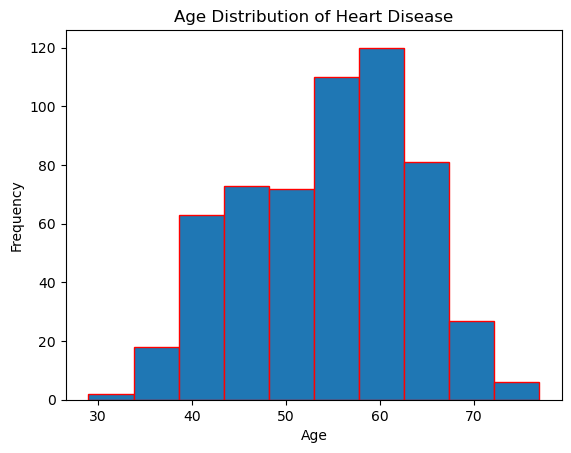

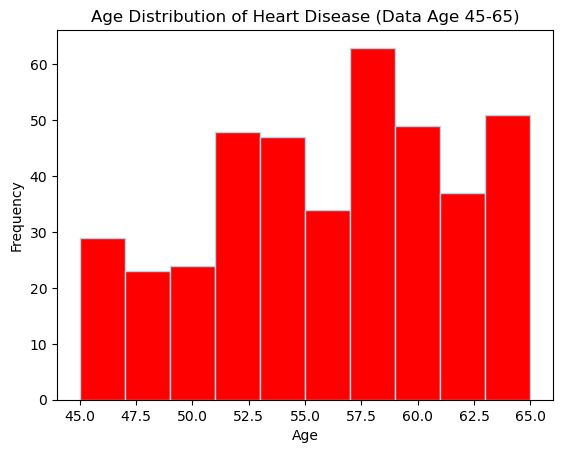

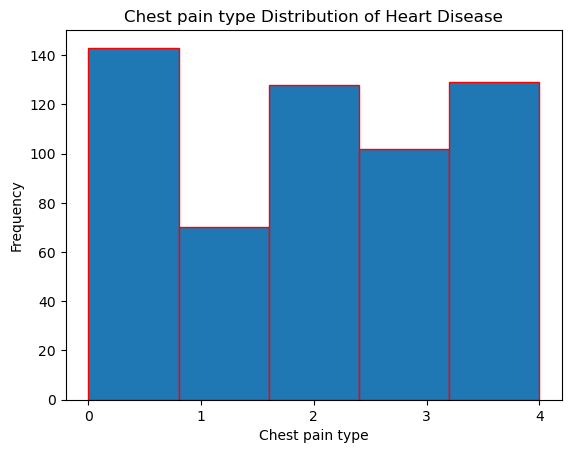

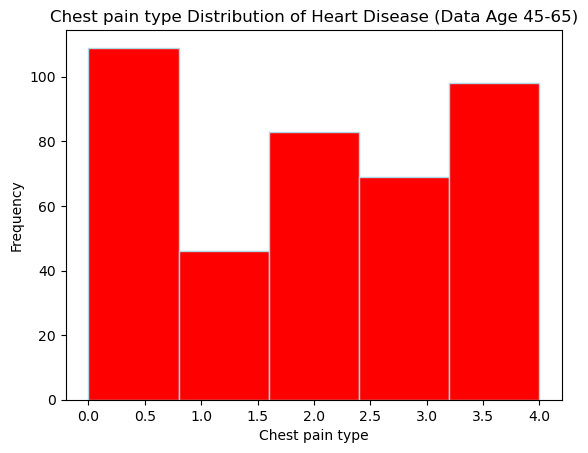

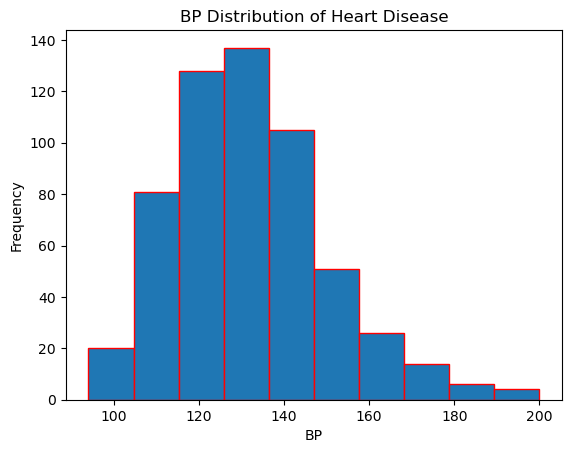

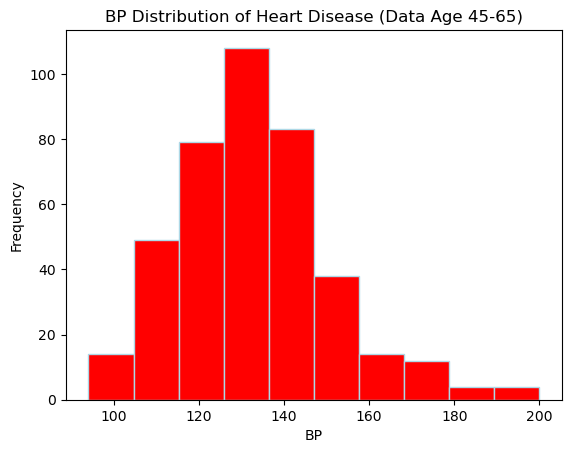

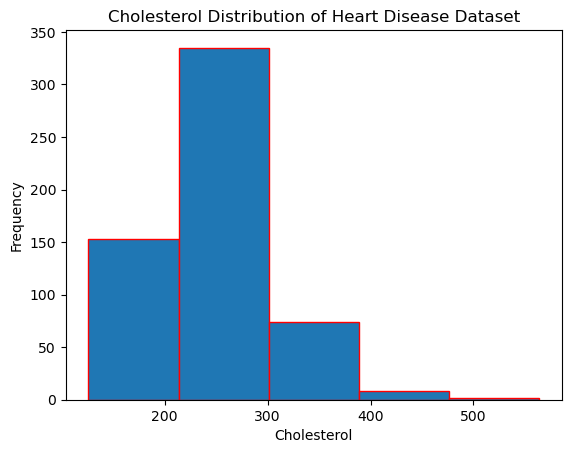

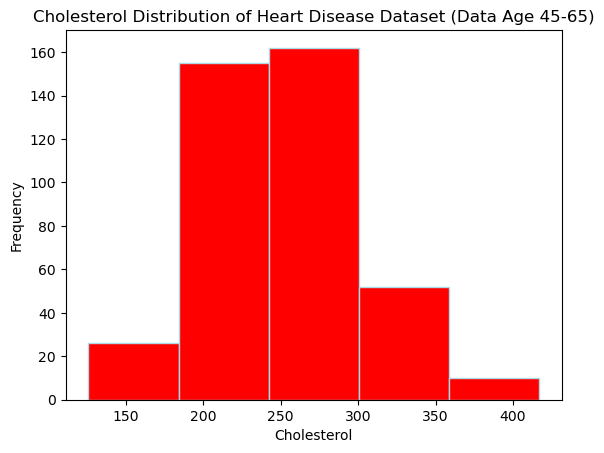

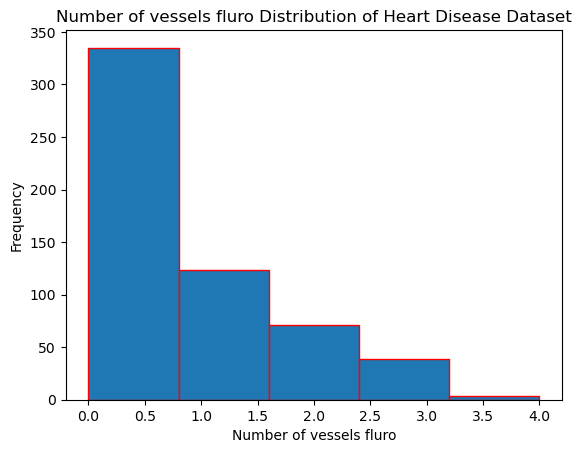

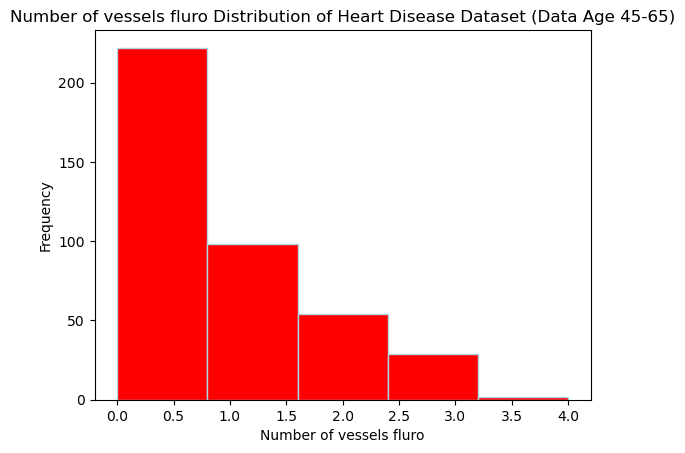

In [48]:
#Disply Histogram of each column

# Age Hist.
plt.hist(heart_data_clean['Age'], ec = 'red', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Heart Disease')
plt.savefig("./Fig1.png")
plt.show()

# Age Hist. (Age 45-65)
plt.hist(Focal_group['Age'], color = "red", ec = 'lightblue', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Heart Disease (Data Age 45-65)')
plt.savefig("./Fig2.png")
plt.show()


# Chest pain type Histogram
plt.hist(heart_data_clean['Chest pain type'], ec = 'red', bins=5)
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3','4'])
plt.title('Chest pain type Distribution of Heart Disease')
plt.savefig("./Fig3.png")
plt.show()

# Chest pain type Histogram (Age 45-65)
plt.hist(Focal_group['Chest pain type'], color = 'red', ec = 'lightblue', bins=5)
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.title('Chest pain type Distribution of Heart Disease (Data Age 45-65)')
plt.savefig("./Fig4.png")
plt.show()

#Blood Pressure Histogram
plt.hist(heart_data_clean['BP'], ec = 'red', bins=10)
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.title('BP Distribution of Heart Disease')
plt.savefig("./Fig5.png")
plt.show()

#Blood Pressure Histogram (Age 45-65)
plt.hist(Focal_group['BP'], color = "red", ec = 'lightblue', bins=10)
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.title('BP Distribution of Heart Disease (Data Age 45-65)')
plt.savefig("./Fig6.png")
plt.show()

#Cholesterol Histogram
plt.hist(heart_data_clean['Cholesterol'], ec = 'red', bins=5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution of Heart Disease Dataset')
plt.savefig("./Fig7.png")
plt.show()

#Cholesterol Histogram (Age 45-65)
plt.hist(Focal_group['Cholesterol'], color = "red", ec = 'lightblue', bins=5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution of Heart Disease Dataset (Data Age 45-65)')
plt.savefig("./Fig8.png")
plt.show()

#Number of vessels fluro Histogram
plt.hist(heart_data_clean['Number of vessels fluro'], ec = 'red', bins=5)
plt.xlabel('Number of vessels fluro')
plt.ylabel('Frequency')
plt.title('Number of vessels fluro Distribution of Heart Disease Dataset')
plt.savefig("./Fig9.png")
plt.show()

#Number of vessels fluro Histogram (Age 45-65)
plt.hist(Focal_group['Number of vessels fluro'], color = "red", ec = 'lightblue', bins=5)
plt.xlabel('Number of vessels fluro')
plt.ylabel('Frequency')
plt.title('Number of vessels fluro Distribution of Heart Disease Dataset (Data Age 45-65)')
plt.savefig("./Fig10.png")
plt.show()

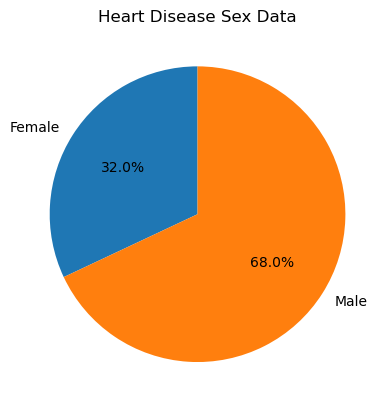

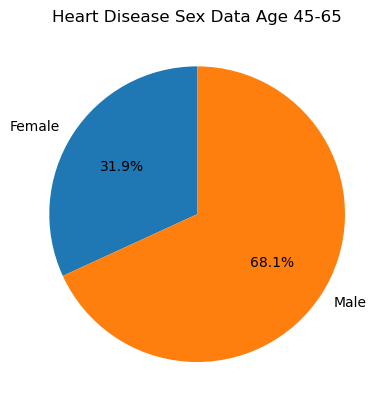

In [19]:
#Pie chart showing percentage of each sex in data

grouped_sex= heart_data_clean.groupby('Sex').size()
labels = ['Female', 'Male']
sizes = grouped_sex.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Sex Data')
# Save the figure
plt.savefig("./Fig11.png")
plt.show()

#Pie chart showing percentage of each sex in data 45-65

grouped_sex= Focal_group.groupby('Sex').size()
labels = ['Female', 'Male']
sizes = grouped_sex.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Sex Data Age 45-65')
# Save the figure
plt.savefig("./Fig12.png")
plt.show()

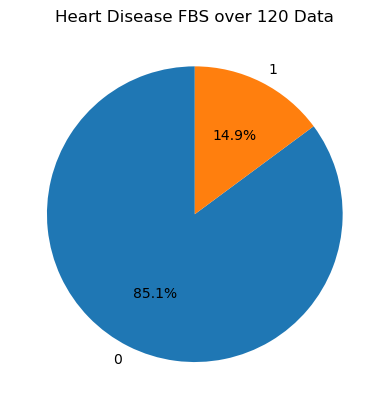

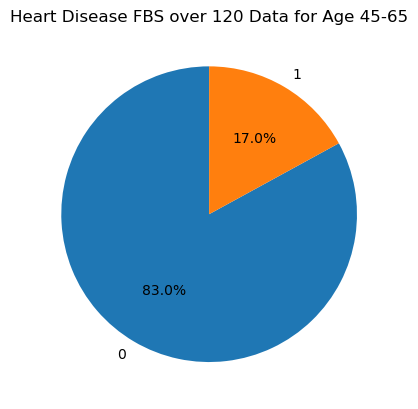

In [20]:
#Pie chart showing FBS over 120

grouped_FBS= heart_data_clean.groupby('FBS over 120').size()
labels = ['0', '1']
sizes = grouped_FBS.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease FBS over 120 Data')
# Save the figure
plt.savefig("./Fig13.png")
plt.show()

#Pie chart showing FBS over 120 for Age 45-65

grouped_FBS= Focal_group.groupby('FBS over 120').size()
labels = ['0', '1']
sizes = grouped_FBS.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease FBS over 120 Data for Age 45-65')
# Save the figure
plt.savefig("./Fig14.png")
plt.show()

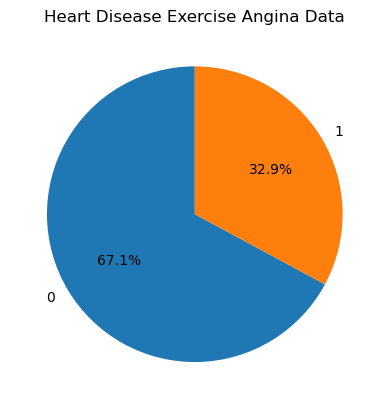

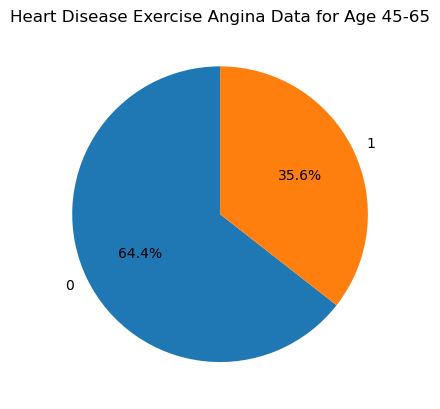

In [21]:
#Pie chart showing Exercise angina

grouped_EA= heart_data_clean.groupby('Exercise angina').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Exercise Angina Data')
# Save the figure
plt.savefig("./Fig15.png")
plt.show()

#Pie chart showing Exercise angina Age 45-65

grouped_EA= Focal_group.groupby('Exercise angina').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Exercise Angina Data for Age 45-65')
# Save the figure
plt.savefig("./Fig16.png")
plt.show()

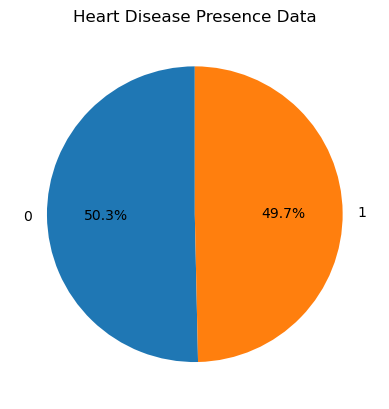

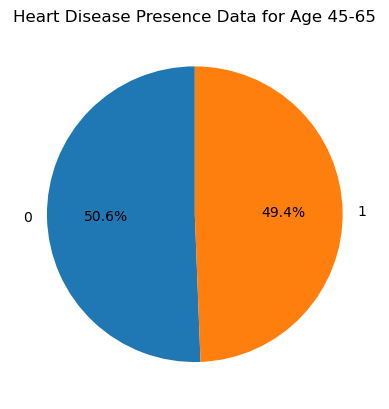

In [22]:
#Pie chart showing Heart Disease Presence

grouped_EA= heart_data_clean.groupby('Heart Disease').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Presence Data')
# Save the figure
plt.savefig("./Fig17.png")
plt.show()

#Pie chart showing Heart Disease Presence 45-65

grouped_EA= Focal_group.groupby('Heart Disease').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Presence Data for Age 45-65')
# Save the figure
plt.savefig("./Fig18.png")
plt.show()

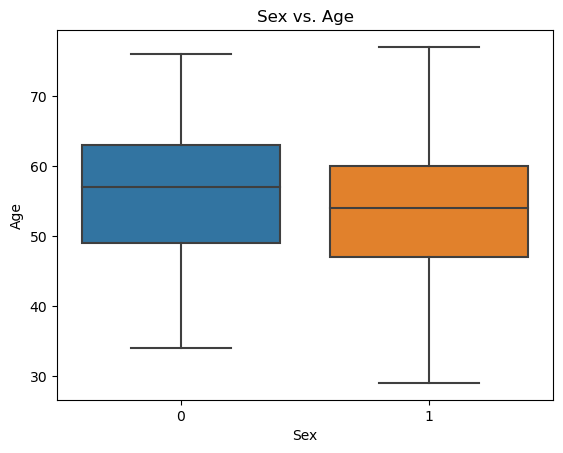

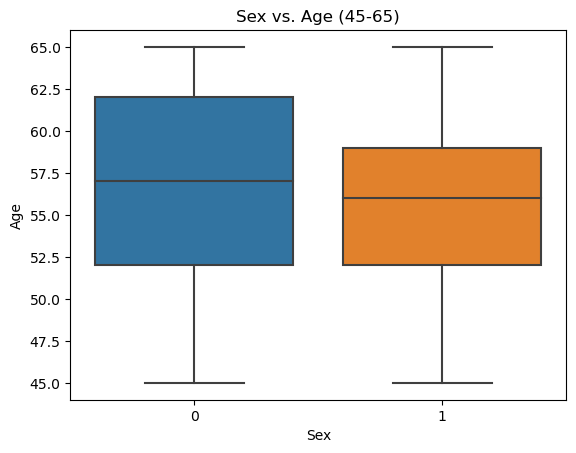

In [23]:
#box plot for sex vs. age

sns.boxplot(x='Sex', y='Age', data=heart_data_clean)
plt.title('Sex vs. Age')
plt.savefig("./Fig19.png")
plt.show()

#box plot for sex vs. age (45-65)
sns.boxplot(x='Sex', y='Age', data=Focal_group)
plt.title('Sex vs. Age (45-65)')
plt.savefig("./Fig20.png")
plt.show()

In [41]:
sex_statistics = heart_data_clean.groupby('Sex')['Age'].describe()
sex_statistics

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,183.0,55.677596,9.486827,34.0,49.0,57.0,63.0,76.0
1,389.0,53.838046,8.816689,29.0,47.0,54.0,60.0,77.0


In [39]:
sex_statistics_focal = Focal_group.groupby('Sex')['Age'].describe()
sex_statistics_focal

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,129.0,56.465116,5.893649,45.0,52.0,57.0,62.0,65.0
1,276.0,55.387681,5.307805,45.0,52.0,56.0,59.0,65.0


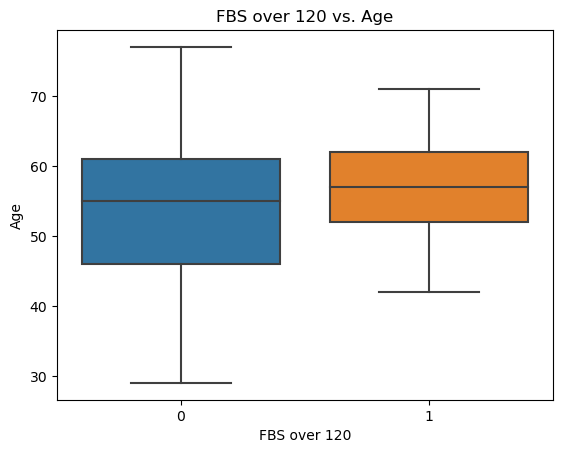

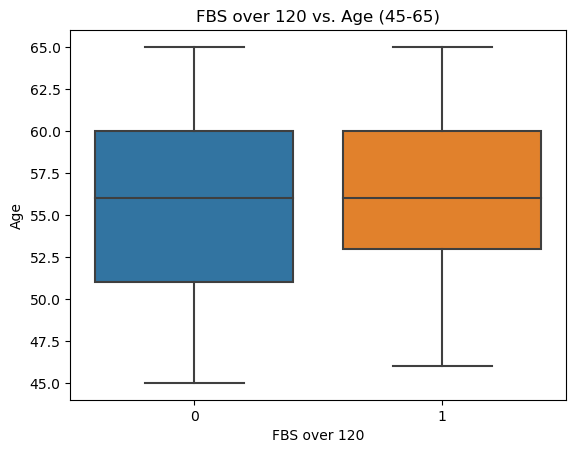

In [24]:
#box plot for FBS over 120 vs. age

sns.boxplot(x='FBS over 120', y='Age', data=heart_data_clean)
plt.title('FBS over 120 vs. Age')
plt.savefig("./Fig21.png")
plt.show()

#box plot for FBS over 120 vs. age (45-65)
sns.boxplot(x='FBS over 120', y='Age', data=Focal_group)
plt.title('FBS over 120 vs. Age (45-65)')
plt.savefig("./Fig22.png")
plt.show()

In [42]:
FBS_over_120_statistics = heart_data_clean.groupby('FBS over 120')['Age'].describe()
FBS_over_120_statistics

,count,mean,std,min,25%,50%,75%,max
FBS over 120,,,,,,,,
0,487.0,53.967146,9.321584,29.0,46.0,55.0,61.0,77.0
1,85.0,57.058824,6.935679,42.0,52.0,57.0,62.0,71.0


In [43]:
FBS_over_120_statistics_focal = Focal_group.groupby('FBS over 120')['Age'].describe()
FBS_over_120_statistics_focal

,count,mean,std,min,25%,50%,75%,max
FBS over 120,,,,,,,,
0,336.0,55.607143,5.651084,45.0,51.0,56.0,60.0,65.0
1,69.0,56.333333,4.800939,46.0,53.0,56.0,60.0,65.0


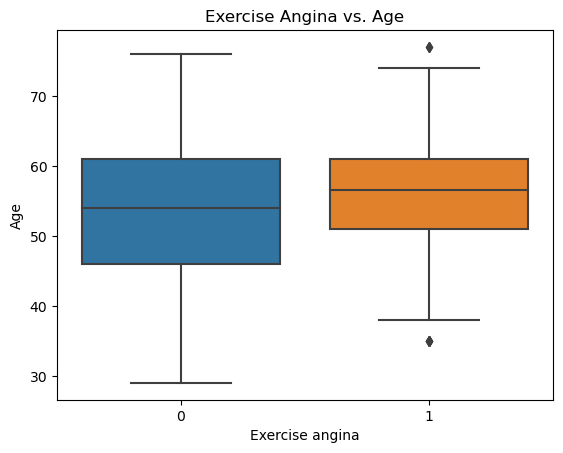

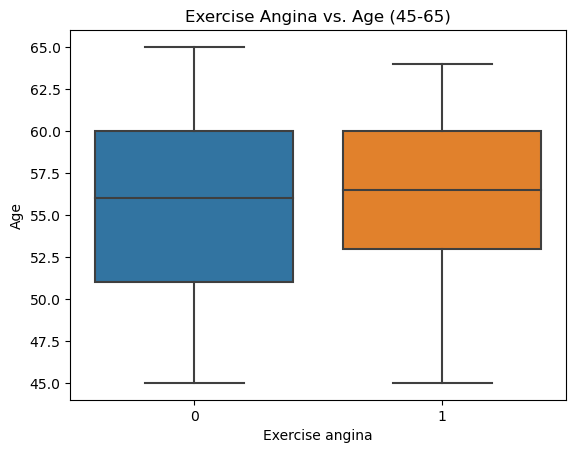

In [25]:
#box plot for Exercise angina vs. age

sns.boxplot(x='Exercise angina', y='Age', data=heart_data_clean)
plt.title('Exercise Angina vs. Age')
plt.savefig("./Fig23.png")
plt.show()

#box plot for Exercise angina vs. age (45-65)
sns.boxplot(x='Exercise angina', y='Age', data=Focal_group)
plt.title('Exercise Angina vs. Age (45-65)')
plt.savefig("./Fig24.png")
plt.show()

In [44]:
Exercise_angina_statistics = heart_data_clean.groupby('Exercise angina')['Age'].describe()
Exercise_angina_statistics

,count,mean,std,min,25%,50%,75%,max
Exercise angina,,,,,,,,
0,384.0,53.820312,9.318081,29.0,46.0,54.0,61.0,76.0
1,188.0,55.664894,8.426432,35.0,51.0,56.5,61.0,77.0


In [45]:
Exercise_angina_statistics_focal = Focal_group.groupby('Exercise angina')['Age'].describe()
Exercise_angina_statistics_focal

,count,mean,std,min,25%,50%,75%,max
Exercise angina,,,,,,,,
0,261.0,55.597701,5.706528,45.0,51.0,56.0,60.0,65.0
1,144.0,55.972222,5.165708,45.0,53.0,56.5,60.0,64.0


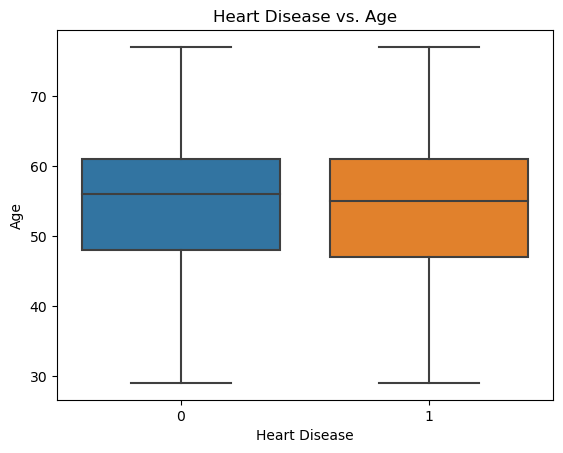

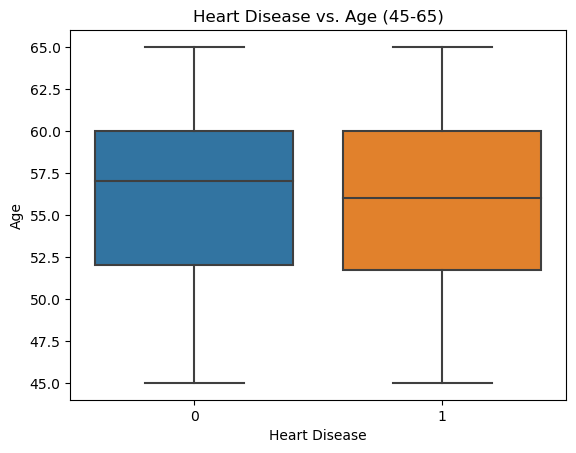

In [26]:
# Heart Disease vs Age
sns.boxplot(x='Heart Disease', y='Age', data=heart_data_clean)
plt.title('Heart Disease vs. Age')
plt.savefig("./Fig25.png")
plt.show()

# Heart Disease vs Age (45-65)
sns.boxplot(x='Heart Disease', y='Age', data=Focal_group)
plt.title('Heart Disease vs. Age (45-65)')
plt.savefig("./Fig26.png")
plt.show()

In [46]:
Heart_Disease_statistics = heart_data_clean.groupby('Heart Disease')['Age'].describe()
Heart_Disease_statistics

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
0,288.0,54.572917,9.000671,29.0,48.0,56.0,61.0,77.0
1,284.0,54.278169,9.151073,29.0,47.0,55.0,61.0,77.0


In [47]:
Heart_Disease_statistics_focal = Focal_group.groupby('Heart Disease')['Age'].describe()
Heart_Disease_statistics_focal

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
0,205.0,55.780488,5.513407,45.0,52.00,57.0,60.0,65.0
1,200.0,55.680000,5.533598,45.0,51.75,56.0,60.0,65.0


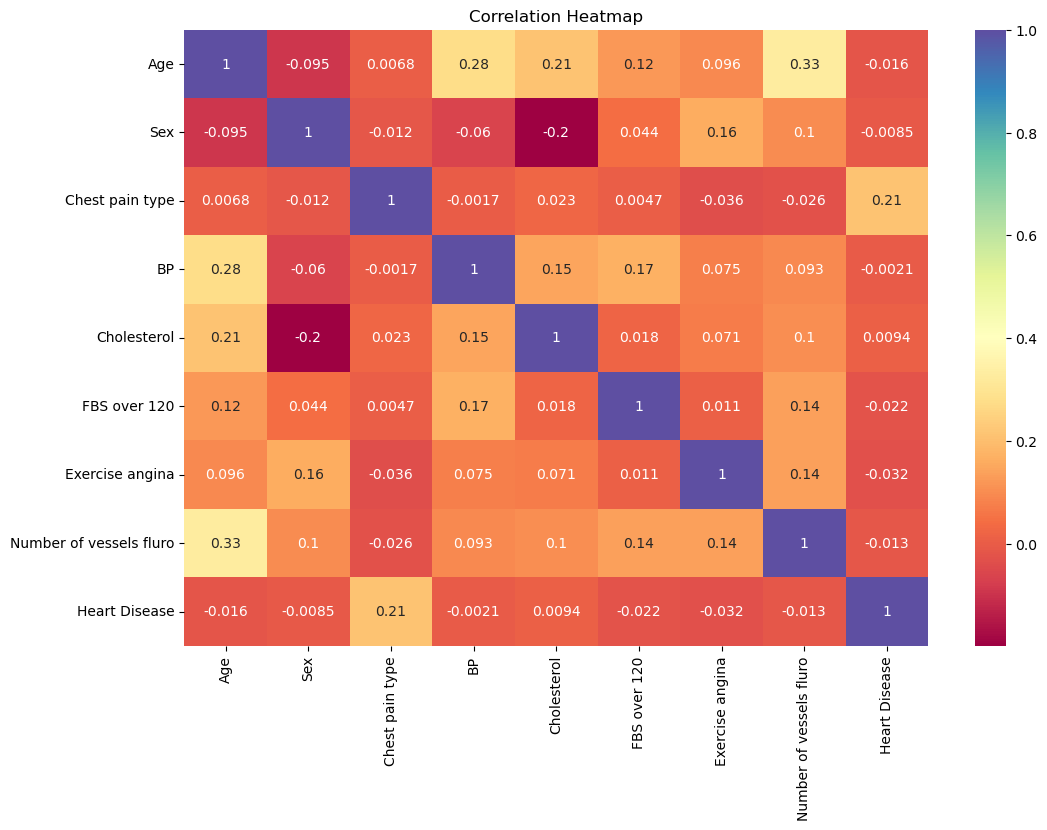

In [27]:
# Correlation matrix

correlation_matrix = heart_data_clean.corr()
plt.figure(figsize= (12, 8))

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Heatmap')
# Save the figure
plt.savefig("./Fig27.png")
plt.show()


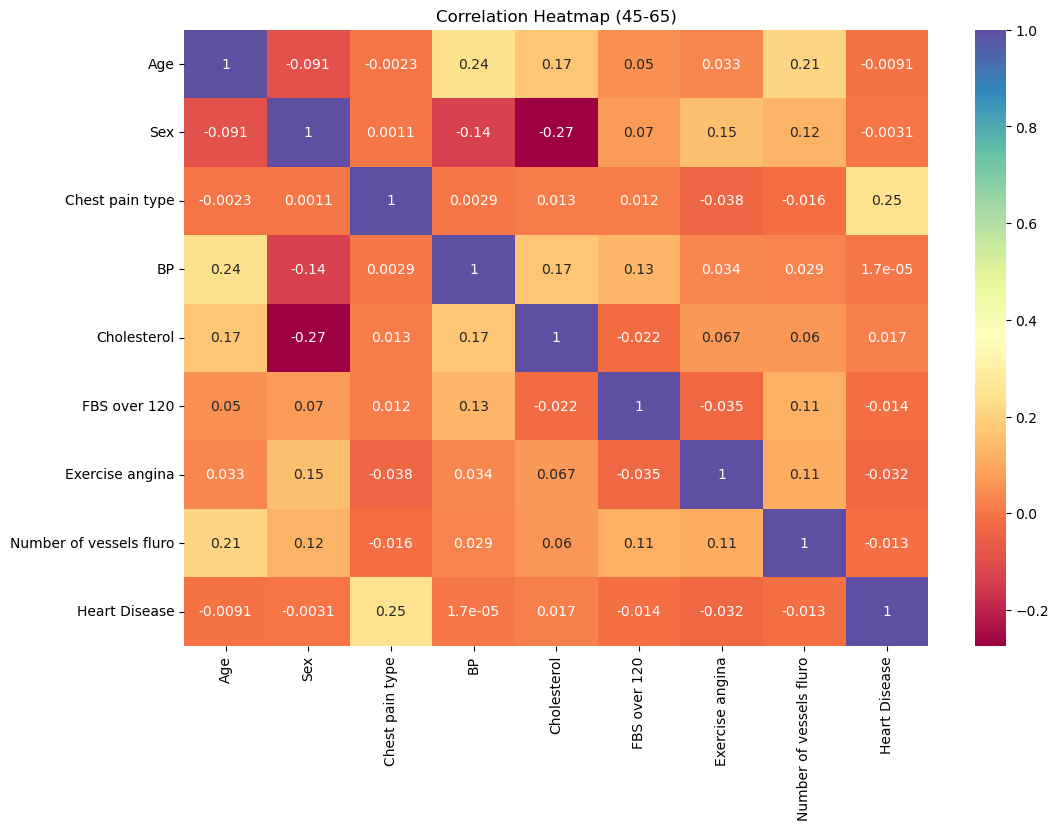

In [28]:
# Correlation matrix for 45-65

correlation_matrix_focal = Focal_group.corr()
plt.figure(figsize= (12, 8))

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix_focal, annot=True, cmap='Spectral')
plt.title('Correlation Heatmap (45-65)')
# Save the figure
plt.savefig("./Fig28.png")
plt.show()


In [29]:
#Heart Disease Presence 

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Heart Disease'], other_age['Heart Disease'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: -0.1990228979204835
p-value: 0.8423158036707854


In [30]:
#Cholestrol

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Cholesterol'], other_age['Cholesterol'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 2.1763539498171296
p-value: 0.029938635096955123


In [31]:
# Blood Pressure

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['BP'], other_age['BP'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 2.4186861784111744
p-value: 0.015888900494817972


In [32]:
#FBS over 120

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['FBS over 120'], other_age['FBS over 120'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 2.2858524826248177
p-value: 0.02262901880566908


In [33]:
#Exercise angina

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Exercise angina'], other_age['Exercise angina'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 2.1364249603975316
p-value: 0.03307001846441823


In [34]:
#Sex

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Sex'], other_age['Sex'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 0.112513312365333
p-value: 0.9104560270678526


In [35]:
#Chest pain type

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Chest pain type'], other_age['Chest pain type'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: -0.11332856505002091
p-value: 0.9098099741294087


In [36]:
#Number of vessels fluro

# Select the data for age group 45-65
age_45_65 = heart_data_clean[(heart_data_clean['Age'] >= 45) & (heart_data_clean['Age'] <= 65)]
# Select the data for other age groups
other_age = heart_data_clean[(heart_data_clean['Age'] < 45) | (heart_data_clean['Age'] > 65)]
# Perform t-test for age group 45-65 vs. other age groups
t_statistic, p_value = stats.ttest_ind(age_45_65['Number of vessels fluro'], other_age['Number of vessels fluro'])
# Print the results
print("T-test results for age group 45-65 vs. other age groups:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-test results for age group 45-65 vs. other age groups:
T-statistic: 1.8107333050704217
p-value: 0.07070850813853972
